### Подключение зависимостей

In [ ]:
from cmath import sqrt
from mimetypes import init
from matplotlib import pyplot as plt
import numpy as np

### Инициализация функций и построение сетки

In [53]:
def fun_parabola(x):
    return x*x

def fun_Sphere(x, y):
    return x*x + y*y
    # f(0, 0) = 0
    # -2 x 2
    # -2 y 2

def fun_Rozenbrok(x, y):
    return 100 * (y - x ** 2) ** 2 + (x - 1) ** 2
    # f(1, 1) = 0
    # -2 x 2
    # -1 y 3

# Выбор функции
fun = fun_Sphere

# Генерация точек
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 4, 50)

# Построение сетки
X, Y = np.meshgrid(x, y)
Z = fun(X, Y)

### Визуализация

Text(0.5, 0, 'z')

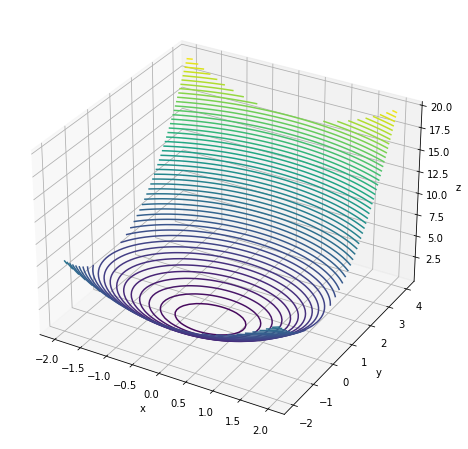

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection = '3d')
ax.contour3D(X, Y, Z, 50, cmap = 'viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Классический градиентный спуск

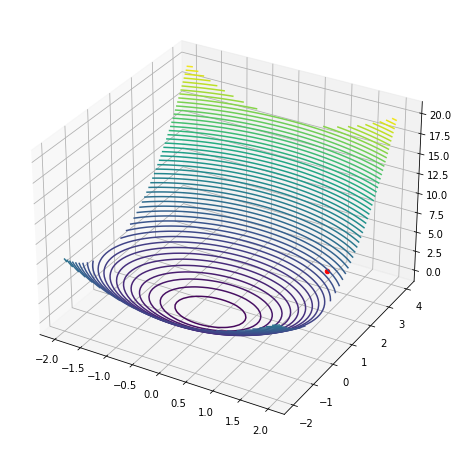

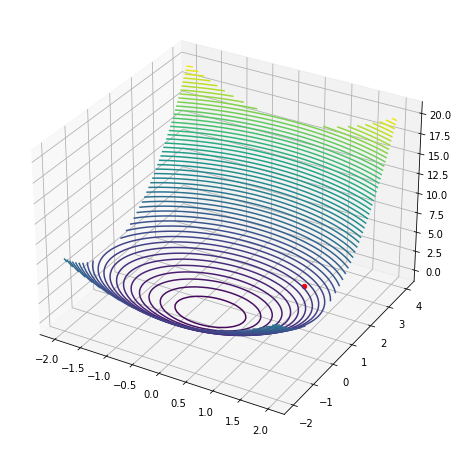

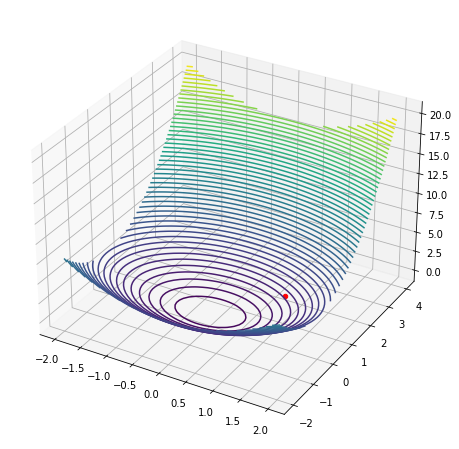

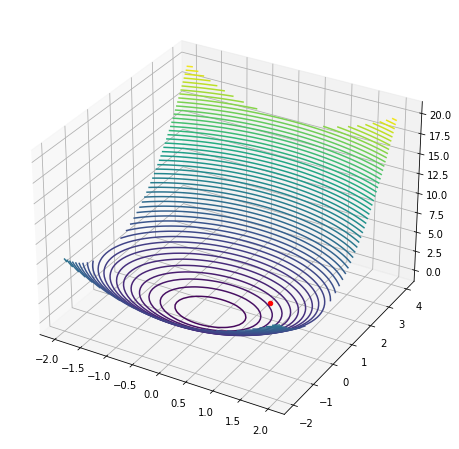

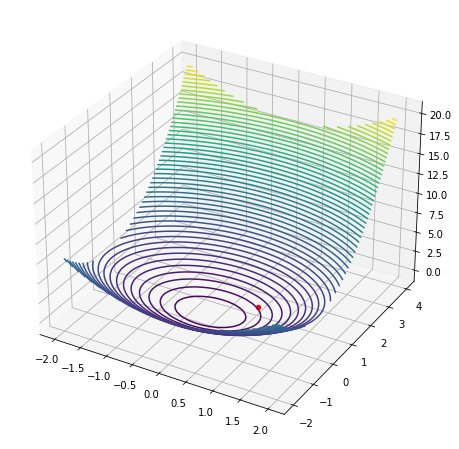

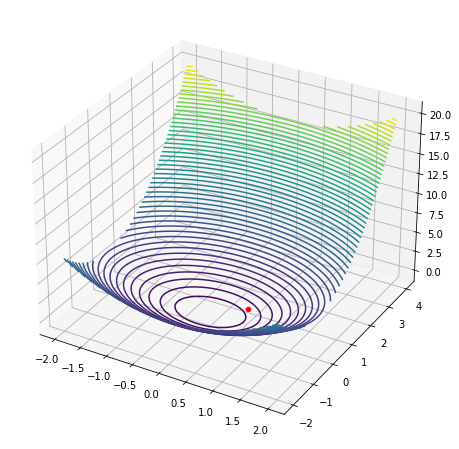

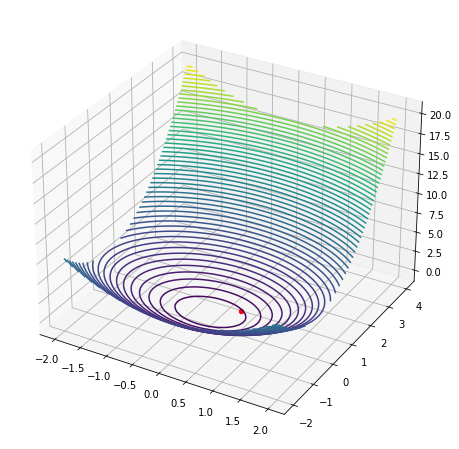

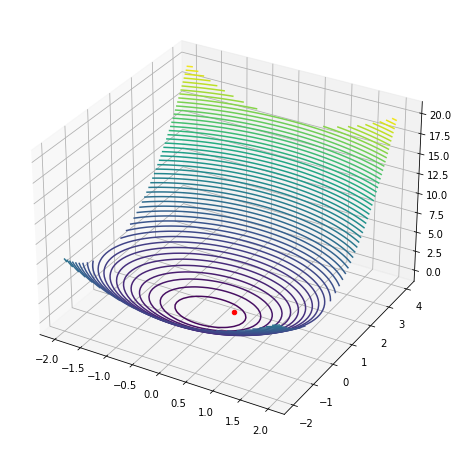

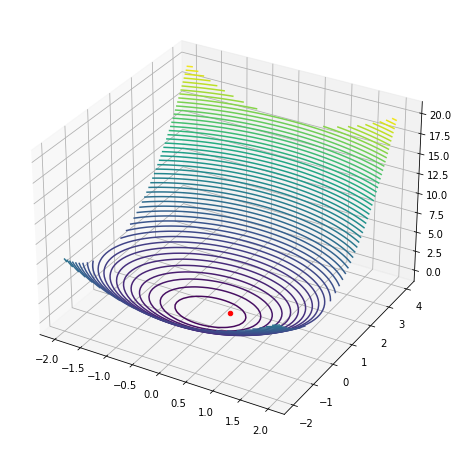

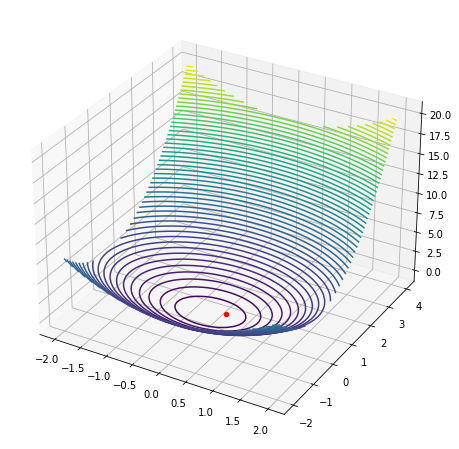

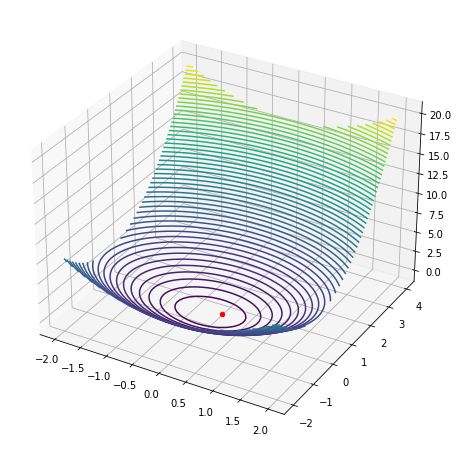

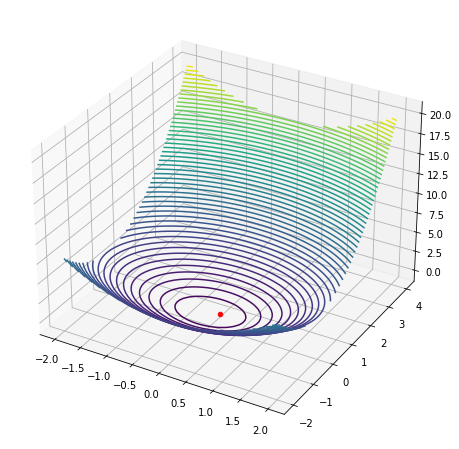

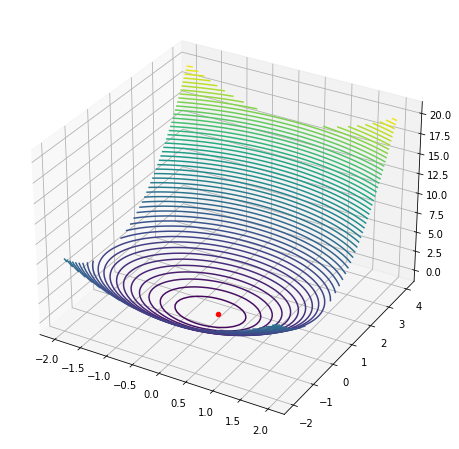

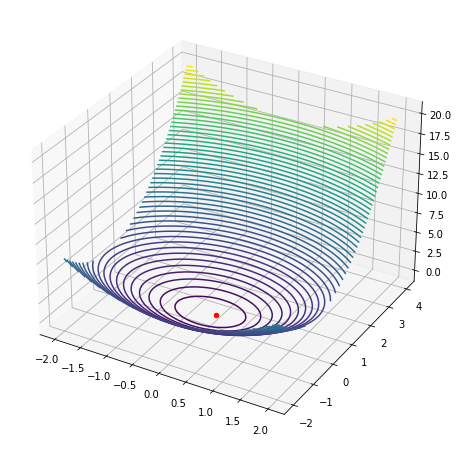

In [50]:
N = 14 # Кол-во итераций
lmd = 0.1 # Скалирование шага
xx, yy = 2, 2 # Начальная точка
new_xx, new_yy = 0, 0
dx = 0.01 
dy = 0.01

for i in range(0, N):
    new_xx = xx - lmd * (fun(xx + dx, yy) - fun(xx, yy)) / dx
    new_yy = yy - lmd * (fun(xx, yy + dy) - fun(xx, yy)) / dy
    xx = new_xx
    yy = new_yy

    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection = '3d')
    ax.contour3D(X, Y, Z, 50, cmap = 'viridis')
    point = ax.scatter(xx, yy, fun(xx, yy), c = "red")

### Градиентный спуск с логарифмически изменяющимся шагом

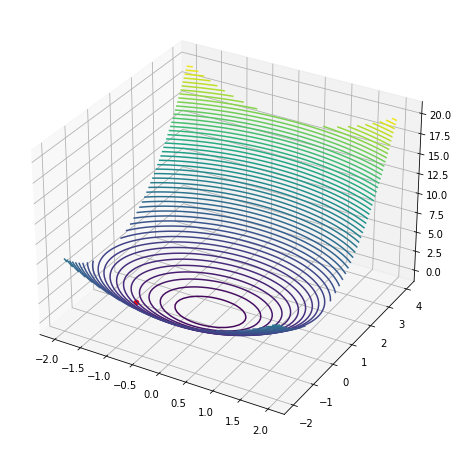

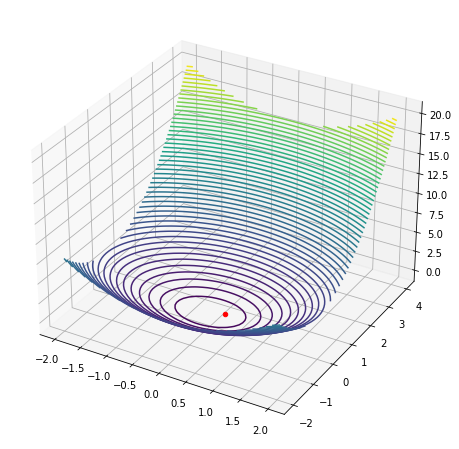

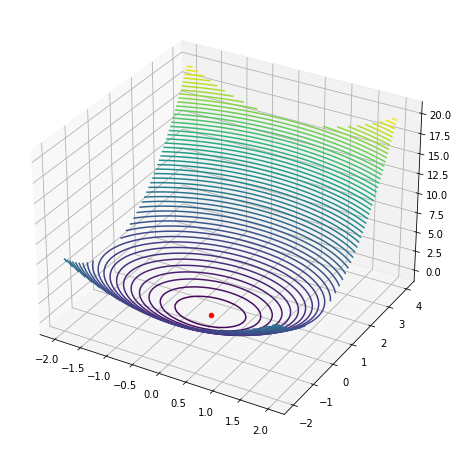

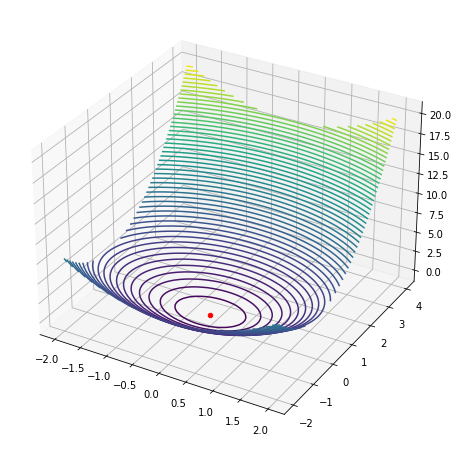

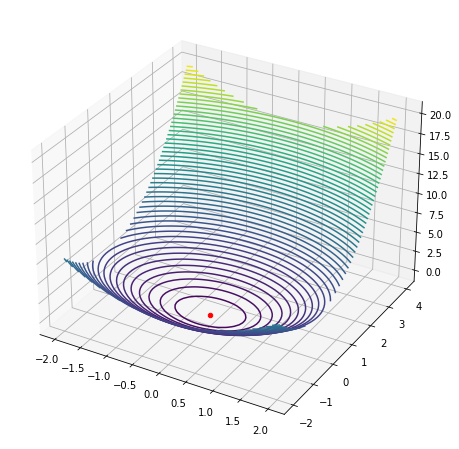

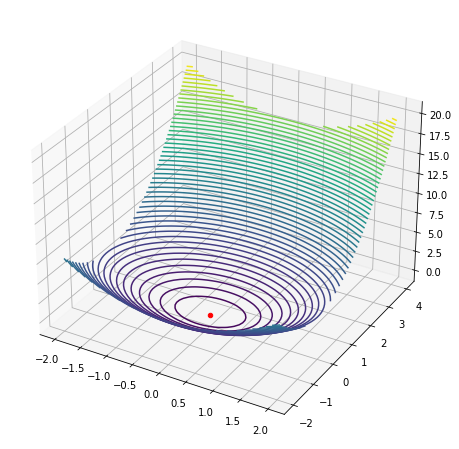

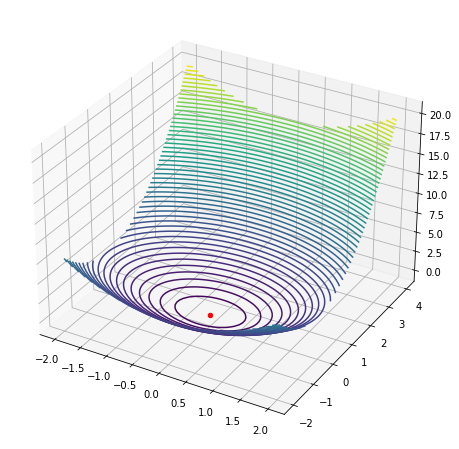

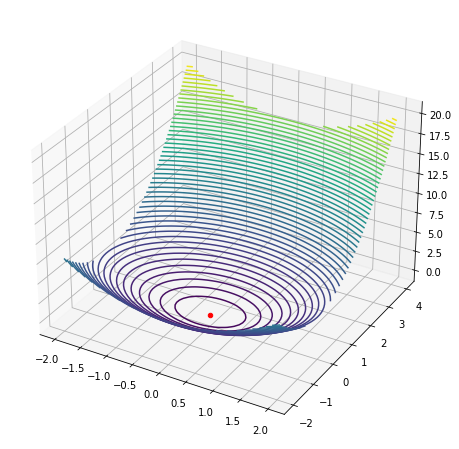

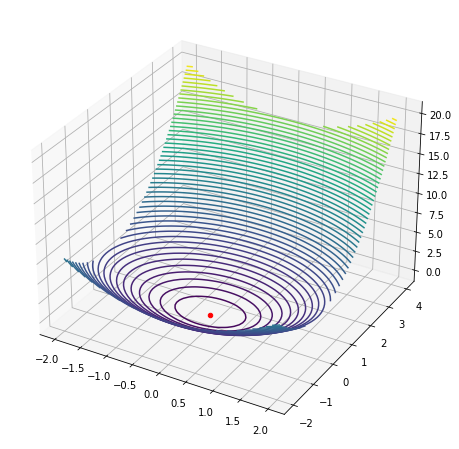

In [52]:
N = 10 # Кол-во итераций
lmd = .75 # Скалирование шага
logBase = 0.8 # Основание логарифма
beta = 0.5 # Коэффициент инертности
xx, yy = 2, 2 # Начальная точка
new_xx, new_yy = 0, 0
dx = 0.01 
dy = 0.01

# Градиентный спуск с моментом импульса
for i in range(0, N - 1):
    new_xx = xx - lmd * (fun(xx + dx, yy) - fun(xx, yy)) / dx 
    new_yy = yy - lmd * (fun(xx, yy + dy) - fun(xx, yy)) / dy 
    xx = new_xx
    yy = new_yy

    lmd *= 0.8

    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection = '3d')
    ax.contour3D(X, Y, Z, 50, cmap = 'viridis')
    point = ax.scatter(xx, yy, fun(xx, yy), c = "red")

### Инертный градиентный спуск

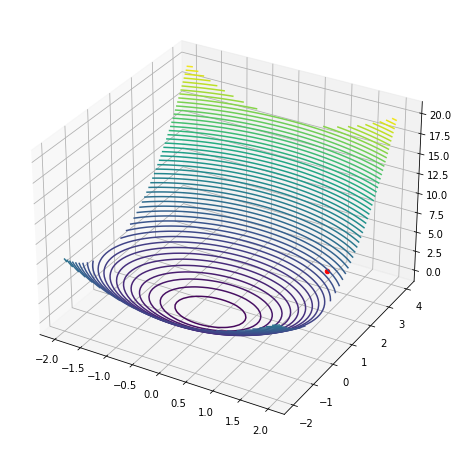

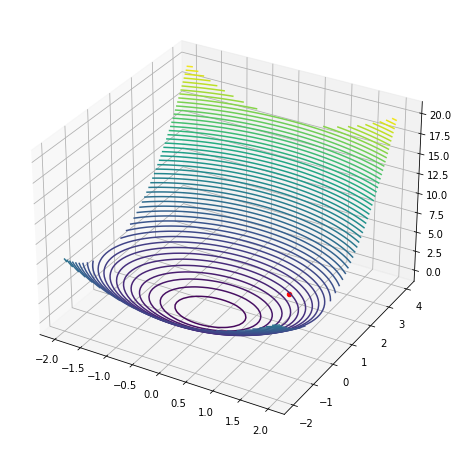

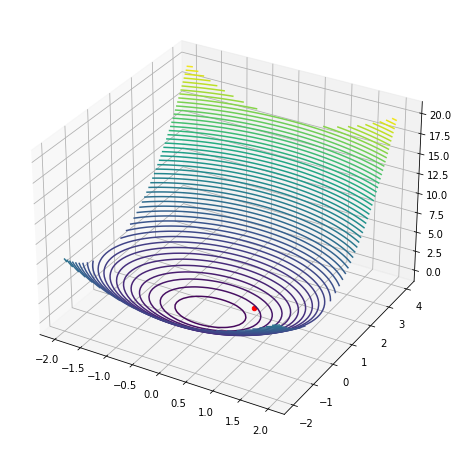

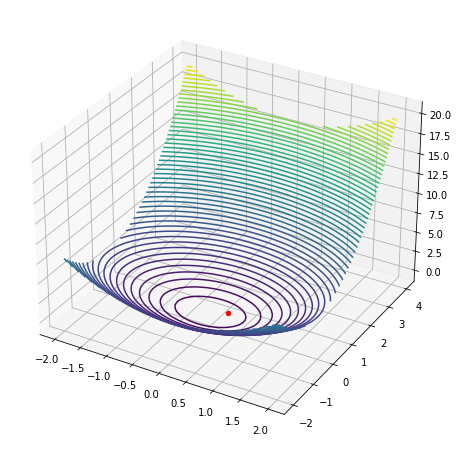

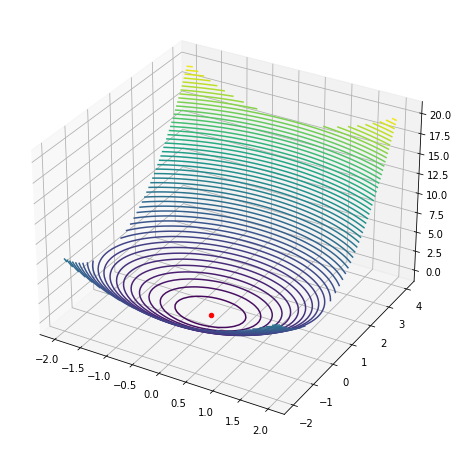

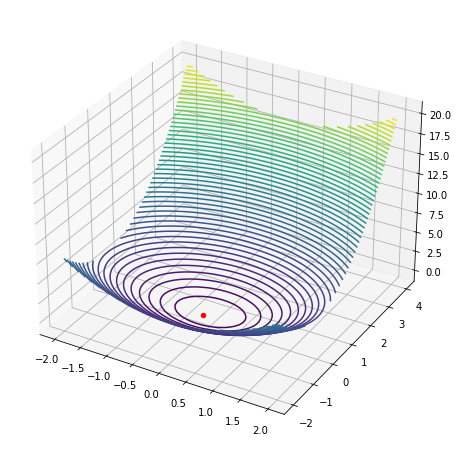

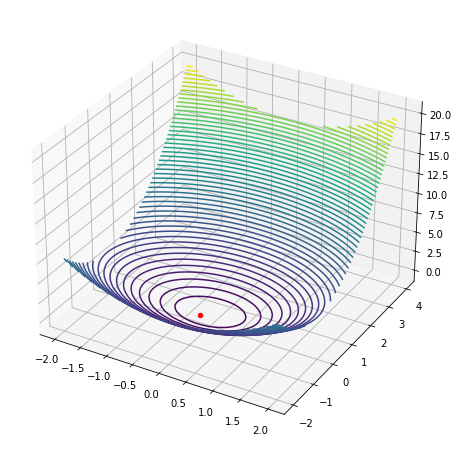

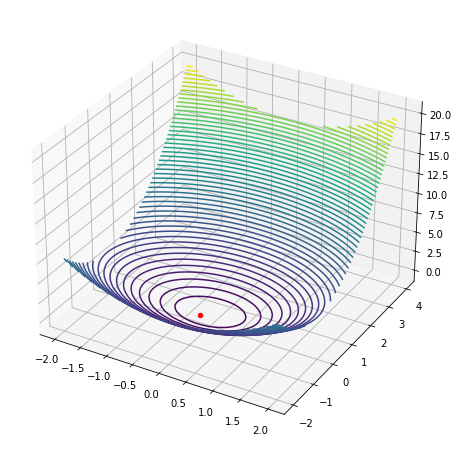

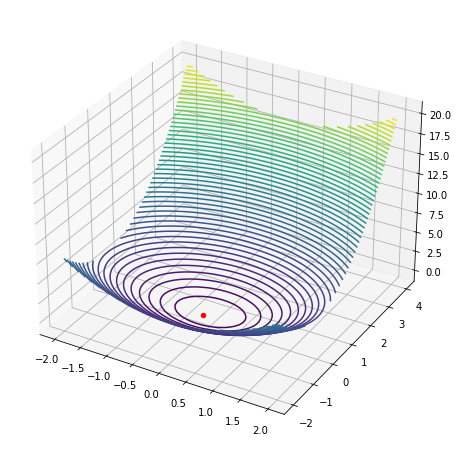

In [51]:
N = 10 # Кол-во итераций
lmd = 0.1 # Скалирование шага
beta = 0.5 # Коэффициент инертности
xx, yy = 2, 2 # Начальная точка
new_xx, new_yy = 0, 0
prev_xx, prev_yy = 0, 0
dx = 0.01 
dy = 0.01

# Расчёт первой и второй точки
new_xx = xx - lmd * (fun(xx + dx, yy) - fun(xx, yy))
new_yy = yy - lmd * (fun(xx, yy + dy) - fun(xx, yy))
prev_xx = xx
prev_yy = yy
xx = new_xx
yy = new_yy

# Градиентный спуск с моментом импульса
for i in range(0, N - 1):
    new_xx = xx - lmd * (fun(xx + dx, yy) - fun(xx, yy)) / dx + beta * (xx - prev_xx)
    new_yy = yy - lmd * (fun(xx, yy + dy) - fun(xx, yy)) / dy + beta * (yy - prev_yy)
    prev_xx = xx
    prev_yy = yy
    xx = new_xx
    yy = new_yy

    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection = '3d')
    ax.contour3D(X, Y, Z, 50, cmap = 'viridis')
    point = ax.scatter(xx, yy, fun(xx, yy), c = "red")